# Lab 2: Understanding dynamics in complex systems

Last week we looked at models of networks, and explored some of the metrics and visualisation techniques we could use to analyse these networks.  This week we turn our attention more specifically to dynamics.  We will use ordinary differential equations to model time dependent complex systems and use some elements of bifurcation analysis to understand the outputs of these models.  

Specifically, let's look at a classic model that underpins complex systems models in a range of applications, from brain dynamics to opinion dynamics: the Kuramoto model.  The Kuramoto model is a 'minimal model' describing oscillator dynamics, and the emergence of oscillator synchronisation.  At its simplest it is an all-to-all network of $N$ oscillators, with each oscillator having its own intrinsic frequency $\omega_i$, and inter-oscillator coupling strength $K$:

$$\frac{d\theta_i}{dt} = \omega_i + \frac{K}{N}\sum_{j=1}^N \sin(\theta_j - \theta_i), \;\;\;\; i = 1,...,N$$

where $\theta_i$ describes the phase of the $i$th oscillator.

There is an enormous amount of work that has been done on this system of equations, and high impact papers are continuing to be published on extensions to the base model.  For an early overview of results see the work by Strogatz (https://www.sciencedirect.com/science/article/pii/S0167278900000944).


## Exercise 1: The simplest related model
A common start point when modelling is to consider first a model which is as simple as possible while still having some connection to the original model.  We will try that here, and in doing so practice using some of the 1D bifurcation analysis content we encountered in the lectures.

### 1a)

Firstly, let's make sure we can read the full model correctly.  Answer the following questions: what order is this system?  Is this system linear or nonlinear (and justify your answer)?  What would we modify if wanted this system to model a network of oscillators without all-to-all connectivity?

### 1b)
The simplest possible version of this model is just the one oscillator coupled to a stationary 'oscillator' at fixed phase $\theta = 0$.  Rewrite this model taking this information into account.  What is the order of the system now?

### 1c)
Carry out fixed point analysis on the system found in 1b.  How many fixed points are there, and what are their stability?  For the case $\omega = 1$, $K = 2$ represent the results on the phase line.

### 1d)
Sketch the bifurcation diagram as a function of $K$.  What, if any, bifurcations occur in this model?  Identify any bifurcation types and bifurcation points.

<div style="background-color:lightcyan;">
<span style="color:red"><center> <h1> Exercise 1 Submission</h1></center></span>
<p>Describe your bifurcation diagram in part 1d and identify any bifurcation types and bifurcation points.</p>
</div>

## Exercise 2: Increasing the order of the problem
In the lectures we looked at a two dimensional model of relationships.  We can apply what we learnt there to this next version of the problem.  

### 2a)
Let's now allow the oscillator fixed in the previous exercise to move.  Consider two oscillators, but both with $\omega = 0$.  Write down the model for this system.


\begin{aligned}
\dot{\theta}_1 &= \frac{K}{2}\,\sin(\theta_2 - \theta_1), \\
\dot{\theta}_2 &= \frac{K}{2}\,\sin(\theta_1 - \theta_2).
\end{aligned}

Or equivalently,

\begin{aligned}
\phi &=  \theta_2 - \theta_1\\
\dot{\phi} &= K\sin(\phi)
\end{aligned}

### 2b)
Identify any fixed points in the system and analyse the behaviour of the oscillators close to any fixed points.  

Fixed points at $\phi=\theta_2-\theta_1=0,\pi$. In other words, if the two oscillators have the same phase or opposite phase. 

For positive K, the same phase (i.e. = 0 case) is a stable fixed point, while the out of phase case is unstable. The inverse is true for negative K.

### 2c)
How does this system relate to the 'model of relationships' examined in the lectures?

### 2d)
Sketch the bifurcation diagram as a function of $K$.  What, if any, bifurcations occur in this model?  Identify any bifurcation types and bifurcation points.

<div style="background-color:lightcyan;">
<span style="color:red"><center> <h1> Exercise 2 Submission</h1></center></span>
<p>Describe your bifurcation diagram in 2d and identify any bifurcation types and bifurcation points.</p>
</div>

## Exercise 3: Simulating the full problem
We are now ready to tackle the full Kuramoto model problem.  We would like to do this in a way that minimises the use of for loops, so that the simulations run in a reasonable time in Python.  To do this we will have to rewrite our derivatives function in a matrix form.  We will assume we have a matrix of coupling strengths (an adjacency matrix, specifying the connectivity of the oscillators) and vectors of the oscillator phases and the oscillator natural frequencies.  We will then use `scipy.integrate.solve_ivp` to numerically integrate the system of equations.

### 3a) **Advanced**
In preparation for the full $N$ oscillator problem (with $N$ a control parameter), let's rewrite the two oscillator problem in terms of matrices and vectors.  Let's take ${\bf K}$ as a coupling matrix, with $K_{ij}$ describing the coupling between the $i$ and $j$ oscillators (let's take the coupling to be symmetric).  Show that we can return a vector of $d{\bf \theta}/dt$ values given a vector of oscillator phases $\theta$ through the following relation:
$$\frac{d\theta}{dt} = \omega + (\cos \theta [\bf{K}\sin(\theta)] - \sin\theta [\bf{K}\cos\theta])/N$$
where $\omega$ is also a vector.  Note, the products inside the square brackets involves a matrix multiplying a vector (in Python you use the `@` symbol to specify this).

You may find the following identity useful:
$$\sin(\theta_j - \theta_i) = \sin\theta_j\cos\theta_i - \cos\theta_j\sin\theta_i.$$

### 3b)
Using the relation derived in 3a) solve the problem numerically with symmetric coupling of $K = 1$ between two oscillators and $\omega$ and initial phases $\theta(0)$ chosen from the uniform random distribution $[0,2\pi)$ for both oscillators. Plot the phases of the oscillators versus $t$.

omega = [3.21587011 5.97193953]
theta(0) = [0.90578156 5.96054027]


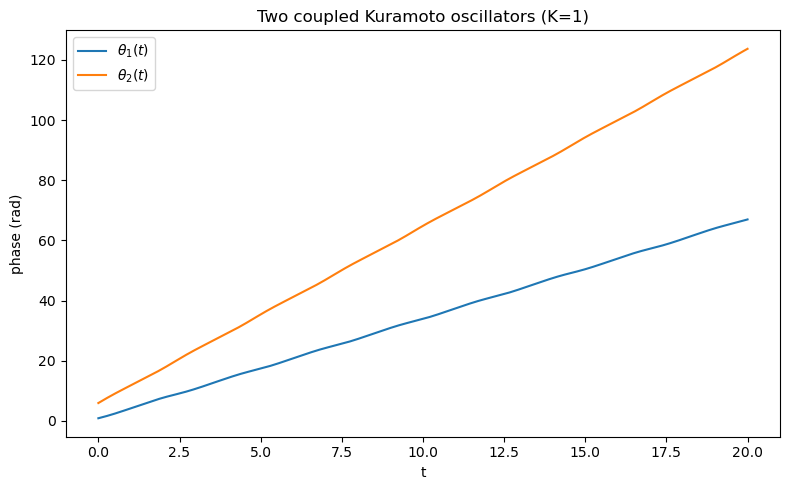

In [17]:
# two_kuramoto.py
# Simulate two Kuramoto oscillators with symmetric coupling K=1
# Using the mean-field form:
# dθ_i/dt = ω_i + (K/N) [ cos(θ_i) * Σ_j sin(θ_j) - sin(θ_i) * Σ_j cos(θ_j) ]
# with N = 2.

import numpy as np
import matplotlib.pyplot as plt

# --- parameters ---
N = 2
K = 1
T = 20.0          # total time
dt = 0.01
steps = int(T / dt)

# For reproducibility, set a seed (or remove this line for fresh draws each run)
rng = np.random.default_rng(1)

# Natural frequencies and initial phases ~ U(0, 2π)
omega = rng.uniform(0.0, 2*np.pi, size=N)
theta0 = rng.uniform(0.0, 2*np.pi, size=N)

def rhs(theta):
    """Right-hand side of the mean-field Kuramoto equations for general N."""
    s = np.sin(theta).sum()
    c = np.cos(theta).sum()
    return omega + (K / N) * (np.cos(theta) * s - np.sin(theta) * c)

# --- integrate with RK4 ---
theta = np.empty((steps + 1, N), dtype=float)
theta[0] = theta0.copy()
t = np.linspace(0.0, T, steps + 1)

for n in range(steps):
    th = theta[n]
    k1 = rhs(th)
    k2 = rhs(th + 0.5 * dt * k1)
    k3 = rhs(th + 0.5 * dt * k2)
    k4 = rhs(th + dt * k3)
    theta[n + 1] = th + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

# Wrap phases to [0, 2π) for plotting readability
# theta_wrapped = np.mod(theta, 2*np.pi)
theta_wrapped = theta

print(f"omega = {omega}")
print(f"theta(0) = {theta0}")

# --- plot ---
plt.figure(figsize=(8, 5))
plt.plot(t, theta_wrapped[:, 0], label=r'$\theta_1(t)$')
plt.plot(t, theta_wrapped[:, 1], label=r'$\theta_2(t)$')
plt.xlabel('t')
plt.ylabel('phase (rad)')
plt.title('Two coupled Kuramoto oscillators (K=1)')
plt.legend()
plt.tight_layout()
plt.show()


### 3c)
Solve the problem now for $N = 20$ oscillators.  Vary your value of $K$ and examine the results.  Do you see any evidence of a qualitative change in your results (i.e. evidence of a bifurcation)?

### 3d)
It is difficult to analyse a series of different oscillators.  We would like to have some quantity that we can monitor as a function of a control parameter.  For the Kuramoto oscillator case this is served by introducing an 'order parameter' which captures the mean field behaviour of the collection of oscillators.  The complex order parameter is defined by the following equation:
$$re^{i\psi} = \frac{1}{N}\sum_{j=1}^N e^{i\theta_j}.$$
The order parameter serves to capture the centroid of the oscillator motion, with $r(t)$ measuring the phase coherence and $\psi(t)$ measuring the average phase.  We can see from the definition that if all the oscillator phases are identical (i.e. all $\theta_j$ equal) then $r = 1$ and $\psi = \theta_j$.  In this case the oscillators are synchronised.  If instead the oscillators are equally spaced around the unit circle then $r = 0$ (zero synchronisation).  For $K = 3$ (constant across an all-to-all network) and $N = 20$ plot $r(t)$ and $\psi(t)$ versus $t$ for $t\in[0,50]$.  Interpret your results.

<div style="background-color:lightcyan;">
<span style="color:red"><center> <h1> Exercise 3 Submission</h1></center></span>
<p>Submit the plot you produced for 3d.</p>
</div>

## Exercise 4: Bifurcations in the Kuramoto model?
We are now ready to perform more sophisticated analysis.  Are bifurcations possible in a system with 20 oscillators?  To explore this question we can examine the nature of the order parameter as a function of a system parameter, such as the coupling strength. 

### 4a)
For the single run conducted in 3d) calculate the average $r$ value across the range $25 \le t \le 50$.

### 4b)
Repeat the experiment in 3d) and the calculation in 4a) some number of times, e.g. 100 times, and show a histogram of the results and interpret this.

### 4c)
Now we are ready to examine the behaviour as a function of a parameter.  Vary the coupling $K \in [1,5]$ and plot the average $r$ versus $K$.  Note in your title the parameters you have used to carry out your analysis.

### 4d)
Let's now consider a different distribution of parameters.  Sample the values for $\omega_i$ from a normal distribution with mean 0 and standard deviation 1.  Carry out again the analysis conducted in 4c and superimpose the results on the same plot as that produced in 4c.

<div style="background-color:lightcyan;">
<span style="color:red"><center> <h1> Exercise 4 Submission</h1></center></span>
<p>Submit the plot you produced for 4d, i.e. the order parameter plot for the two different $\omega$ distributions.  </p>
</div>

## Exercise 5 [Optional Extension]: Effect of network connectivity on qualitative dynamics
In this final exercise we can now explore how the network structure affects the synchronisation properties of a set of Kuramoto oscillators.  This is an area of current research, so we will just touch on possible directions.

One option is to consider a 2D array of oscillators with some spatial dependent coupling (perhaps nearest neighbours on a grid) and explore the types of pattern formation that may occur.  This model is used in brain dynamics work (see e.g. https://www.frontiersin.org/journals/computational-neuroscience/articles/10.3389/fncom.2012.00067/full).  

**Question:** Construct a 2D planar model of Kuramoto oscillators, with nearest neighbour coupling, and visualise the dynamics using an image plot. 

Another option is to consider network connectivity which doesn't necessarily come from a spatial relationship between oscillators.  For instance, this could be a random network of Kuramoto oscillators or a Barabasi-Albert network of Kuramoto oscillators (see e.g. https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.106.128701).

**Question:** How do the qualitative properties change when we move from an all-to-all network?  For instance, to a Barabasi-Albert network?

In this optional extension, try to construct a network which is not all-to-all and explore how the earlier analysis changes in your case.


<div style="background-color:lightcyan;">
<span style="color:red"><center> <h1> Exercise 5 Submission</h1></center></span>
<p>Optionally submit a figure displaying the results of your work.</p>
</div>